# Bộ dữ liệu Movielens 1M

## Giới thiệu

[Movielens](https://grouplens.org/datasets/movielens/) là một nhóm cung cấp các bộ dữ liệu cho các bài toán xây dựng Hệ thống gợi ý. Các bộ dữ liệu trong tập này bao gồm thông tin đánh giá xếp hạng của người dùng tới các bộ phim. Những thông tin về người dùng hay các bộ phim cũng được cung cấp.

Trong cuốn sách này, chúng ta sẽ sử dụng bộ dữ liệu [Movielens 1M](https://grouplens.org/datasets/movielens/1m/). Bộ dữ liệu này bao gồm xâp xỉ 1 triệu bộ `(user, movie, rating)` từ khoảng 3900 bộ phim và  6040 người dùng.

Trong các phần tiếp theo, khoảng 90% của số đánh giá sẽ được tách ra làm dữ liệu huấn luyện, 10% còn lại được dùng làm dữ liệu đánh giá.

## Download bộ dữ liệu
Bộ dữ liệu này có thể được download trực tiếp từ trang chủ [Movielens 1M](https://grouplens.org/datasets/movielens/1m/) hoặc sử dụng `tabml.datasets`:

In [1]:
import tabml.datasets
df_dict = tabml.datasets.download_as_dataframes("movielen-1m")
df_dict.keys()

dict_keys(['users', 'movies', 'ratings'])

Có ba dataframe trong bộ dữ liệu này là `users, movies` và `ratings` lần lượt chứa thông tin của người dùng, bộ phim và các đánh giá.


## Khám phá dữ liệu

### Rating

Dưới đây là 10 dòng đầu tiên của dataframe rating. Dữ liệu rating bao gồm thông tin về mã người dùng `UserID`, mã phim `MovieID`, đánh giá trong thang điểm 5 và thời điểm đánh giá `Timestamp`.

In [2]:
ratings = df_dict["ratings"]
ratings.head(10)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


Phân phối của các điểm đánh giá cho trong biểu đồ dưới đây cho chúng ta thấy rằng điểm 4 được đánh giá nhiều nhất trong khi các điểm 1 và 2 có ít lượng đánh giá nhất. Điều này có thể được giải thích bằng sự thật là người dùng thường đánh giá khi họ rất thích một bộ phim; khi họ không thực sự thích, họ sẽ ít ra đánh giá hơn.

<AxesSubplot:ylabel='Frequency'>

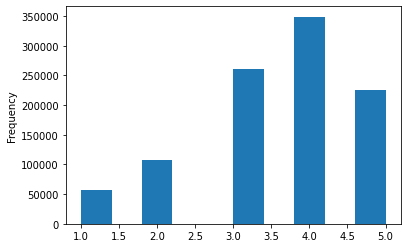

In [3]:
ratings["Rating"].plot.hist()

Tiếp theo, chúng ta sẽ xem số lượng bộ phim mà mỗi người dùng đánh giá cũng như số lượng đánh giá mà mỗi bộ phim nhận được:

In [4]:
ratings["UserID"].value_counts()

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
761       20
1493      20
5533      20
2714      20
2696      20
Name: UserID, Length: 6040, dtype: int64

Ta thấy rằng người dùng có mã số 4169 đánh giá tới 2314 bộ phim và 20 là số lượng đánh giá ít nhất mà mỗi người dùng đưa ra. Có thể thấy rằng nhóm tác giả của bộ dữ liệu này đã lọc đi các người dùng có ít đánh giá. Sự lý tưởng này khó đạt được trong thực tế vì phần lớn người dùng không đưa ra đánh giá nào. Việc mỗi người dùng đánh giá nhiều bộ phim khiến cho độ chính xác khi gợi ý được cao hơn.

In [5]:
ratings["MovieID"].value_counts()

2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3323       1
624        1
763        1
2484       1
133        1
Name: MovieID, Length: 3706, dtype: int64

Ở khía cạnh bộ phim, bộ phim có mã số 2858 được đánh giá nhiều nhất với 3428 lần trong khi rất nhiều bộ phim chỉ nhận được một đánh giá.

### Dữ liệu người dùng

In [6]:
users = df_dict["users"]
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


Như vậy có 6040 người dùng cùng với đầy đủ các thông tin về giới tính, tuổi, nghề nghiệp và Zip-code. Chúng ta sẽ không sử dụng thông tin về Zip-code vì số lượng các giá trị phân biệt là quá lớn. Chúng ta cùng xem nhanh phân bố của các thông tin về giới tính, tuổi và nghề nghiệp.

In [7]:
users["Gender"].value_counts()

M    4331
F    1709
Name: Gender, dtype: int64

Có 4331 người dùng là nam và 1709 người dùng là nữ.

<AxesSubplot:>

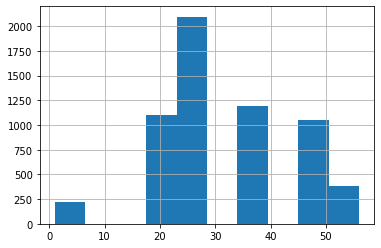

In [8]:
users["Age"].hist()

Phần lớn người dùng có độ tuổi từ 18 đến 34, nhóm dưới 18 tuổi có số người dùng nhỏ nhất.
Dữ liệu về nghệ nghiệp đã được mã hóa thành các số từ 0 đến 20:

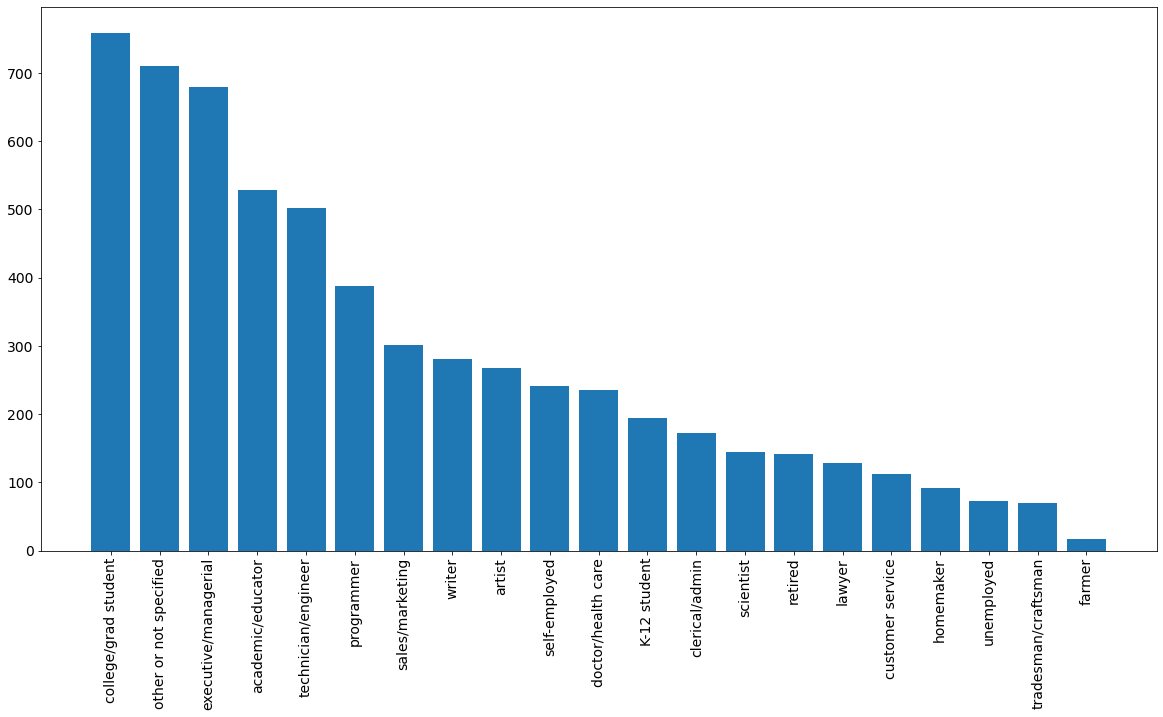

In [9]:
import matplotlib
from matplotlib import pyplot as plt


occupation_mapping = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer",
}

occupation_id_count = users["Occupation"].value_counts().to_dict()
occupation_count = {
    occupation_mapping[id]: count for id, count in occupation_id_count.items()
}


matplotlib.rcParams.update({"font.size": 14})
plt.figure(figsize=(20, 10))
plt.bar(x=occupation_count.keys(), height=occupation_count.values())
plt.xticks(rotation=90)
plt.show()

Không có gì bất ngờ, các bạn sinh viên xuất hiện nhiều trong bộ dữ liệu nhất còn các bác nông dân xuất hiện ít nhất.

### Dữ liệu bộ phim

In [10]:
movies = df_dict["movies"]
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


Có 3883 bộ phim với đầy đủ thông tin về tiêu đề (`Title`) và các thể loại (`Genres`). Cùng xem một vài dòng đầu của dataframe này:

In [11]:
movies.head(10)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Như vậy, năm sản xuất của bộ phim cũng xuất hiện trong tiêu đề. Thông tin về năm sản xuất cũng hoàn toàn có thể là một đặc trưng tốt cho việc xây dựng mô hình. Ngoài ra, một bộ phim có thể thuộc nhiều thể loại.

Tiếp theo, chúng ta cùng trả lời hai câu hỏi:

1. Số lượng thể loại mà mỗi bộ phim thuộc về.
2. Số lượng bộ phim thuộc mỗi thể loại

In [12]:
movies["num_genres"] = movies["Genres"].apply(lambda x: len(x.split('|')))
movies["num_genres"].value_counts()

1    2025
2    1322
3     421
4     100
5      14
6       1
Name: num_genres, dtype: int64

Trả lời cho câu hỏi thứ nhất, hầu hết các bộ phim thuộc vào một thể loại. Số lượng thể loại nhiều nhất mà một bộ phim thuộc về là 6 và chỉ có một bộ phim như vậy.

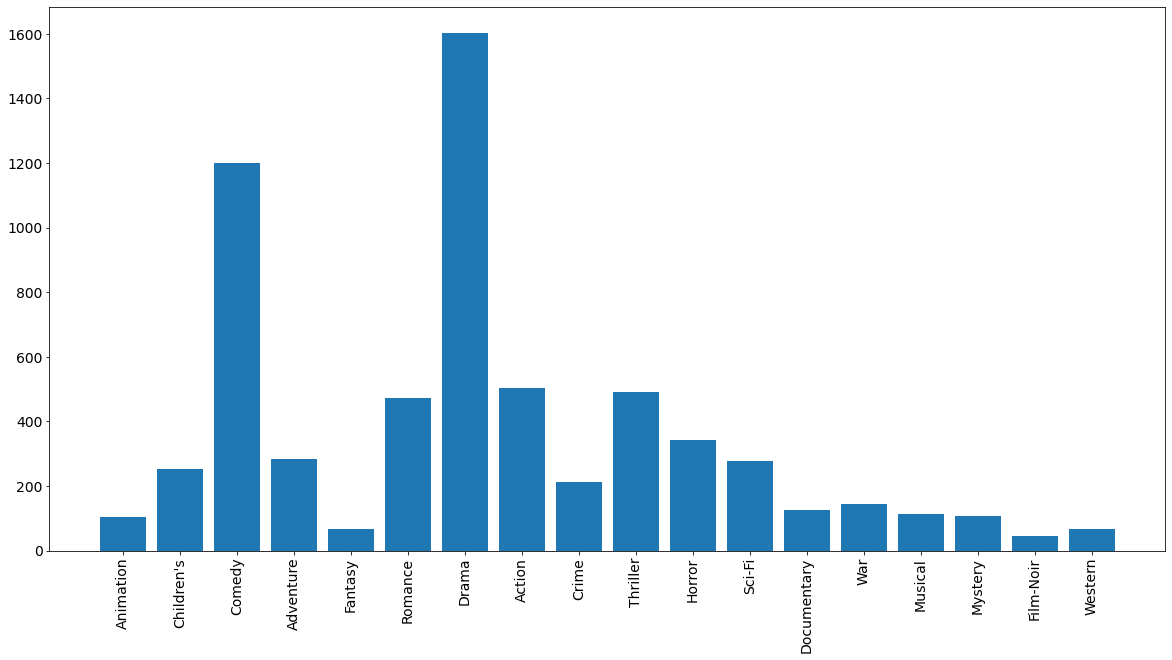

In [13]:
from collections import defaultdict

genres_counter = defaultdict(int)
for genre_str in movies["Genres"]:
    genres = genre_str.split('|')
    for genre in genres:
        genres_counter[genre] += 1
        
plt.figure(figsize=(20, 10))
plt.bar(x=genres_counter.keys(), height=genres_counter.values())
plt.xticks(rotation=90)
plt.show();

Trả lời cho câu hỏi thứ hai, ta thấy rằng thể loại `Drama` và `Comedy` có nhiều bộ phim nhất. Các thể loại `Animation, Fantasy, "Documentary, War, Mystery, Film-Noir` và `Western` có ít bộ phim nhất với khoảng từ 50 đến 100 bộ phim.